<h1 style="color:red;text-align: center";> ISAT 449 Emerging Topics in Data Science </h1>
<h2 style="color:red;text-align: center";> Training a Multilayer Perceptron Model using Scikit-Learn
<img   src="images/MLP.png" width=400; height=400>
<br>
<h3 style="color:red;text-align: center";> Completed by Quron Anthony

# Objectives

# Multilayer Perceptron Model for Image Classification (Digits Dataset)
- Create and use Machine Learning Models with SciKit Learn
- Perform Classification with SciKit Learn MLPClassifier
- Hyperparameter Tuning
    - Loss Functions
    - Optimization Algorithms
    - Number of Hidden Layers in MLP Models
- Algorithmic Bias
    - Test for Balanced Datasets
- Plotting the Loss Curve during Training
- Create Predictive Models
- Perform Model Evaluation
    - Model Score and Accuracy
- Confusion Matrix

## Loading packages 

In [1]:
%matplotlib inline
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt



# Recognizing Hand-Written Digits
- The dataset cosists of 1797 images
- Each image is a hand-written digit
- Each image is 8x8 pixel square

## Import and Load Sci-kit Learn's Built In Image Dataset

In [2]:
# Standard SciPy Stack Python imports
from sklearn import datasets
# Load the digits dataset
digits = datasets.load_digits()

## Shape of Data Array

In [3]:
print('The data set has a shape of: {}'.format(digits.data.shape))

The data set has a shape of: (1797, 64)


## Showing One of the Images

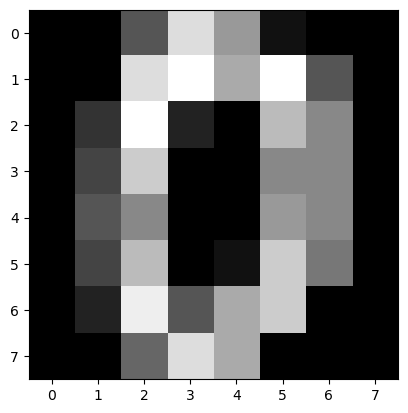

In [4]:
import matplotlib.pyplot as plt
plt.gray()
plt.imshow(digits.images[0])
plt.show()

## Creating the feature matrix and target vector

In [5]:
# Feature Matrix
X = digits.data

#Target vector
y = digits.target

#View the first image's feature values as a flattened vector
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
#Now as an image array (matrix)
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [7]:
#The digits dataset
print("The digits are NumPy arrays as can be seen here: {}".format(type(digits.images[0])))

The digits are NumPy arrays as can be seen here: <class 'numpy.ndarray'>


In [8]:
print('The array for an arbitrary digit is: \n\n{}'.format(digits.images[0]))

The array for an arbitrary digit is: 

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [9]:
print('The target vector consist of digits from 0 to 9. The first 20 are printed below {}'.format(digits.target[:20]))

The target vector consist of digits from 0 to 9. The first 20 are printed below [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


## Normalize the data for better fitting and convergence 

In [10]:
#Before normalization 
print(f'Before normalization: X_min={X.min()}, X_max={X.max()}')

Before normalization: X_min=0.0, X_max=16.0


In [11]:
#Normalize the dataset. We should really be using something like MinMaxScaler here
X = X/16.0

In [12]:
#After Normalization 
print(f'After normalization: X_min{X.min()}, X_max{X.max()}')

After normalization: X_min0.0, X_max1.0


## Testing and Splitting Data 

In [13]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=0)

## Print a Selection of Training Images and their Labels 

In [14]:
def plot_example(X,y):
    "This code plots the first 5 images and their lables in a row."
    for i, (img,y) in enumerate(zip(X[:5].reshape(5,8,8),y[:5])):
        plt.subplot(151 + i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)

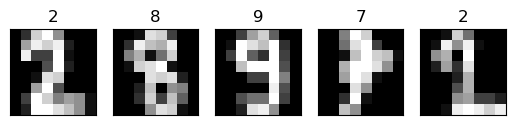

In [15]:
plot_example(X_train,y_train)

<BarContainer object of 10 artists>

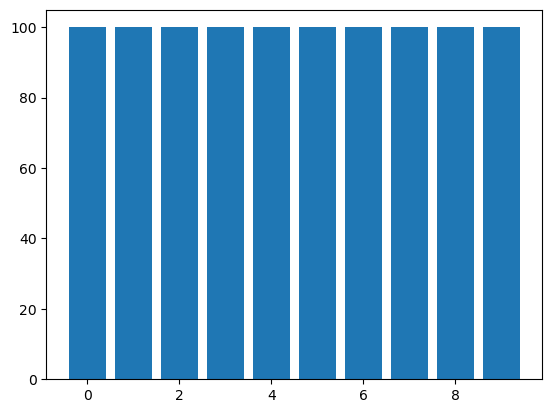

In [16]:
plt.bar(np.unique(y_train), height = 100)


## Shape of the Dataset

In [17]:
print('X_train Shape of the data: {}'.format(X_train.shape))
print('y_train Shape of the data: {}'.format(y_train.shape))

X_train Shape of the data: (1347, 64)
y_train Shape of the data: (1347,)


In [18]:
print('X_test Shape of data: {}'.format(X_test.shape))
print('y_test Shape of data: {}'.format(y_test.shape))

X_test Shape of data: (450, 64)
y_test Shape of data: (450,)


In [19]:
print('Class labels:', np.unique(y_train))
print('Class proportions:', np.bincount(y_train))

Class labels: [0 1 2 3 4 5 6 7 8 9]
Class proportions: [141 139 133 138 143 134 129 131 126 133]


## The Model Using a Miltilayer Perceptron Classifier
# Parameters
- hidden layer = 256 neurons
- hidden layer = 128 neurons 
- hidden layer = 32 neurons 
- solver='adam'
- learning_rate_init = 0.001
- tol = 1e-3
- max_iter = 500


In [20]:
mlp_digits_model = MLPClassifier(hidden_layer_sizes=(256,128,32),max_iter=500,
                                alpha=0.001, solver='adam', random_state= 0, verbose = False,
                                 tol = 1e-3)


## Training (fitting) the Model

In [21]:
mlp_digits_model.fit(X_train,y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(256, 128, 32), max_iter=500,
              random_state=0, tol=0.001)

## Plotting the loss during training 

In [22]:
loss_values = mlp_digits_model.loss_curve_

Text(0.5, 1.0, 'Loss Values')

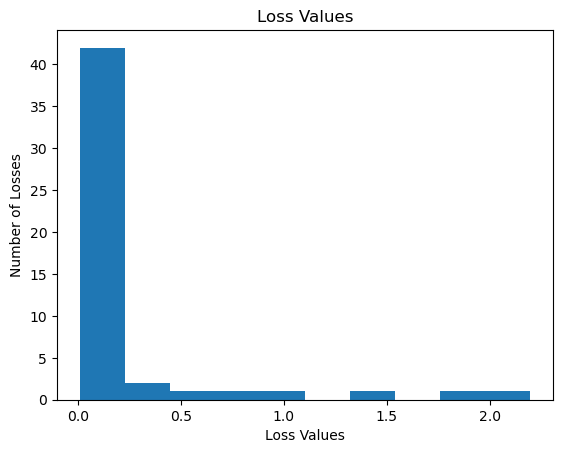

In [23]:
plt.hist(loss_values)
plt.xlabel('Loss Values')
plt.ylabel('Number of Losses');
plt.title('Loss Values')

# Evaluating MLPClassifier Model

### Model Performance - Predictions

In [24]:
y_pred = mlp_digits_model.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 4 7 4 8 5 8 5 5 2 5 9 0 7 1 4 4 3
 4 8 9 7 9 8 2 1 5 2 5 8 4 1 7 0 6 1 5 5 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 1 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 9 8 5 4 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 6 9
 5 6 8 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 2 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 1 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 3 3 2 1 5 5 9 1 3 7 0 0 7 0 4 5 9 3 3 4 3 1 8 9 5 3 6 2 1 6 2
 1 7 5 5 1 9]


### Model Performance - Accuracy 

In [25]:
print("Test set score using NumPy: {0:0.2f}".format(np.mean(y_pred==y_test)))

Test set score using NumPy: 0.98


In [26]:
#Another way of doing it 
print("Test set score(accuracy on test set): {0:0.2f}".format(mlp_digits_model.score(X_test,y_test)))

Test set score(accuracy on test set): 0.98


### Model Peformance - Errors 

In [27]:
error_mask = y_pred !=y_test

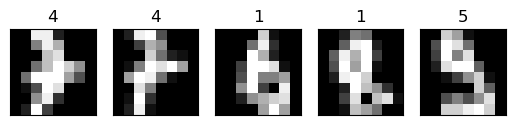

In [28]:
plot_example(X_test[error_mask], y_pred[error_mask])

# Classification Report & Confusion Matrix

### Classification Report 

In [29]:
from sklearn import metrics
print("Classification Report:")
print(metrics.classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.98      0.94        43
           2       0.98      1.00      0.99        44
           3       1.00      0.98      0.99        45
           4       0.95      1.00      0.97        38
           5       0.96      0.98      0.97        48
           6       0.98      0.98      0.98        52
           7       1.00      0.96      0.98        48
           8       1.00      0.92      0.96        48
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



### Confusion Matrix 

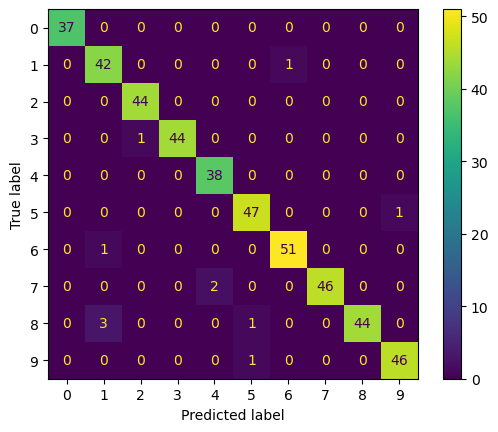

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, )
disp = ConfusionMatrixDisplay(confusion_matrix=cm, )
disp.plot()
plt.show()

### Plotting Images and the Predictions 

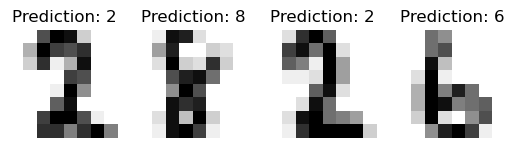

In [31]:
images_and_predictions = list(zip(X_test.reshape(len(X_test),8,8), y_pred))

for index, (image,prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2,4,index+1)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)
    
plt.show()

 # Exercise 1

 Number 8 had the most misclassifications, often confused for the number 1. Therefore, this must be the hardest to classify

# Exercise 2


In [32]:
sgd_mlp_digits_model = MLPClassifier(hidden_layer_sizes=(256,128,32),max_iter=1000,
                                alpha=0.01, solver='sgd', random_state= 1, verbose = True,
                                 tol = 1e-4)
sgd_mlp_digits_model.fit(X_train,y_train)

Iteration 1, loss = 2.34510824
Iteration 2, loss = 2.33240864
Iteration 3, loss = 2.31411492
Iteration 4, loss = 2.29412884
Iteration 5, loss = 2.27622001
Iteration 6, loss = 2.26048573
Iteration 7, loss = 2.24595313
Iteration 8, loss = 2.23222587
Iteration 9, loss = 2.21855803
Iteration 10, loss = 2.20488442
Iteration 11, loss = 2.19092806
Iteration 12, loss = 2.17681877
Iteration 13, loss = 2.16264370
Iteration 14, loss = 2.14822549
Iteration 15, loss = 2.13370234
Iteration 16, loss = 2.11880147
Iteration 17, loss = 2.10383061
Iteration 18, loss = 2.08864742
Iteration 19, loss = 2.07353878
Iteration 20, loss = 2.05819772
Iteration 21, loss = 2.04268433
Iteration 22, loss = 2.02716157
Iteration 23, loss = 2.01147457
Iteration 24, loss = 1.99555359
Iteration 25, loss = 1.97946115
Iteration 26, loss = 1.96329487
Iteration 27, loss = 1.94671818
Iteration 28, loss = 1.93007642
Iteration 29, loss = 1.91303045
Iteration 30, loss = 1.89574201
Iteration 31, loss = 1.87829997
Iteration 32, los

Iteration 253, loss = 0.15674006
Iteration 254, loss = 0.15600407
Iteration 255, loss = 0.15529558
Iteration 256, loss = 0.15462519
Iteration 257, loss = 0.15400389
Iteration 258, loss = 0.15351353
Iteration 259, loss = 0.15280500
Iteration 260, loss = 0.15198479
Iteration 261, loss = 0.15143490
Iteration 262, loss = 0.15081248
Iteration 263, loss = 0.15013282
Iteration 264, loss = 0.14938728
Iteration 265, loss = 0.14894418
Iteration 266, loss = 0.14821347
Iteration 267, loss = 0.14767475
Iteration 268, loss = 0.14694972
Iteration 269, loss = 0.14651043
Iteration 270, loss = 0.14600851
Iteration 271, loss = 0.14520108
Iteration 272, loss = 0.14451705
Iteration 273, loss = 0.14403534
Iteration 274, loss = 0.14340330
Iteration 275, loss = 0.14297046
Iteration 276, loss = 0.14253122
Iteration 277, loss = 0.14170513
Iteration 278, loss = 0.14119391
Iteration 279, loss = 0.14060416
Iteration 280, loss = 0.14005168
Iteration 281, loss = 0.13954510
Iteration 282, loss = 0.13903127
Iteration 

Iteration 507, loss = 0.07310864
Iteration 508, loss = 0.07290794
Iteration 509, loss = 0.07296148
Iteration 510, loss = 0.07250942
Iteration 511, loss = 0.07247299
Iteration 512, loss = 0.07224640
Iteration 513, loss = 0.07204764
Iteration 514, loss = 0.07200311
Iteration 515, loss = 0.07182285
Iteration 516, loss = 0.07159271
Iteration 517, loss = 0.07152852
Iteration 518, loss = 0.07129154
Iteration 519, loss = 0.07126216
Iteration 520, loss = 0.07099489
Iteration 521, loss = 0.07086049
Iteration 522, loss = 0.07071900
Iteration 523, loss = 0.07054692
Iteration 524, loss = 0.07040895
Iteration 525, loss = 0.07020047
Iteration 526, loss = 0.07010545
Iteration 527, loss = 0.06985761
Iteration 528, loss = 0.06978296
Iteration 529, loss = 0.06965513
Iteration 530, loss = 0.06951313
Iteration 531, loss = 0.06935979
Iteration 532, loss = 0.06919294
Iteration 533, loss = 0.06906493
Iteration 534, loss = 0.06895709
Iteration 535, loss = 0.06877597
Iteration 536, loss = 0.06864811
Iteration 

Iteration 759, loss = 0.04604819
Iteration 760, loss = 0.04603487
Iteration 761, loss = 0.04593162
Iteration 762, loss = 0.04595037
Iteration 763, loss = 0.04583614
Iteration 764, loss = 0.04577593
Iteration 765, loss = 0.04565587
Iteration 766, loss = 0.04565221
Iteration 767, loss = 0.04559750
Iteration 768, loss = 0.04547587
Iteration 769, loss = 0.04539992
Iteration 770, loss = 0.04535599
Iteration 771, loss = 0.04525917
Iteration 772, loss = 0.04523874
Iteration 773, loss = 0.04510801
Iteration 774, loss = 0.04505662
Iteration 775, loss = 0.04499054
Iteration 776, loss = 0.04495447
Iteration 777, loss = 0.04486943
Iteration 778, loss = 0.04483563
Iteration 779, loss = 0.04473454
Iteration 780, loss = 0.04473313
Iteration 781, loss = 0.04463823
Iteration 782, loss = 0.04453295
Iteration 783, loss = 0.04455944
Iteration 784, loss = 0.04447021
Iteration 785, loss = 0.04436995
Iteration 786, loss = 0.04429967
Iteration 787, loss = 0.04420941
Iteration 788, loss = 0.04417982
Iteration 

MLPClassifier(alpha=0.01, hidden_layer_sizes=(256, 128, 32), max_iter=1000,
              random_state=1, solver='sgd', verbose=True)

In [33]:
print("Test set score(accuracy on test set): {0:0.2f}".format(sgd_mlp_digits_model.score(X_test,y_test)))

Test set score(accuracy on test set): 0.96


The accuracy with verbose = true is at 96%.The max_iter was at 500. With the max_iter at 1000, the accuracy goes to 97%. Both of these had a learning rate of 0.001.

# Exercise 3

In [34]:
sgd_mlp_digits_model.predict(X_train)

array([2, 8, 9, ..., 7, 7, 8])